In [2]:
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np


In [4]:
train_df = pd.read_csv("C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train.csv")
test_df = pd.read_csv("C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\sample_submission.csv")
train_df.head(8)

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3
5,1.2.826.0.1.3680043.8.498.10053755320637729867...,3
6,1.2.826.0.1.3680043.8.498.10062189329714053601...,14
7,1.2.826.0.1.3680043.8.498.10065930002825553435...,13 20


In [5]:
bodyparts = {
0 : 'Abdomen' ,
1 :'Ankle' ,
2 :'Cervical Spine',
3 : 'Chest' ,
4 :'Clavicles' ,
5 :'Elbow' ,
6 :'Feet' ,
7 : 'Finger' ,
8 : 'Forearm' ,
9 : 'Hand' ,
10 : 'Hip' ,
11 : 'Knee' ,
12 : 'Lower Leg' ,
13 : 'Lumbar Spine' ,
14 : 'Others' ,
15 :'Pelvis',
16 :'Shoulder' ,
17 :'Sinus' ,
18 : 'Skull' ,
19 : 'Thigh' ,
20 :'Thoracic Spine',
21: 'Wrist',
}

In [6]:
# function to extract DICOM tags 

def dcmtag2table(folder, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = []
    print("Listing all files...")
    start = time.time()
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            filelist.append(os.path.join(root, name))
    print("Time: " + str(time.time() - start))
    print("Reading files...")
    time.sleep(2)
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    for i, _tag in enumerate (list_of_tags):
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

In [7]:
tags = ['PhotometricInterpretation','BitsAllocated', 'SOPInstanceUID' ]
dicom_tags_train =  dcmtag2table("C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train", tags)
dicom_tags_test = dcmtag2table("C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\test", tags)

Listing all files...
Time: 0.292142391204834
Reading files...


100%|██████████| 1738/1738 [00:17<00:00, 97.55it/s] 


Finished.
Listing all files...
Time: 0.10685038566589355
Reading files...


100%|██████████| 743/743 [00:06<00:00, 120.25it/s]


Finished.


In [8]:
dicom_tags_train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID
0,C:\Users\Rashane\GitHub\Data\Dataset\train\1\1...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...
1,C:\Users\Rashane\GitHub\Data\Dataset\train\10\...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...
2,C:\Users\Rashane\GitHub\Data\Dataset\train\100...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...
3,C:\Users\Rashane\GitHub\Data\Dataset\train\100...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...
4,C:\Users\Rashane\GitHub\Data\Dataset\train\100...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...


PhotometricInterpretation
MONOCHROME1    1659
MONOCHROME2      79
Name: count, dtype: int64
The following images are with Photometric Interpretation MONOCHROME1


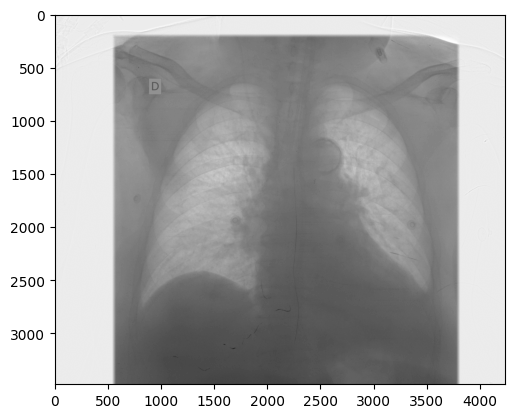

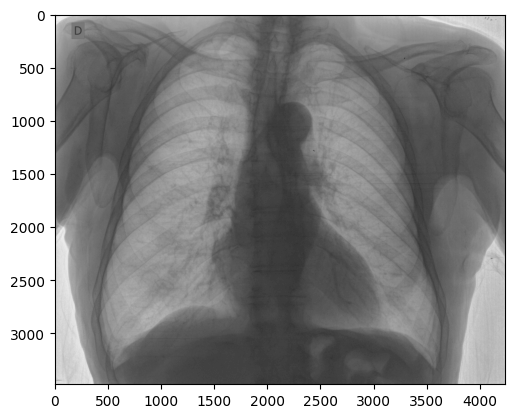

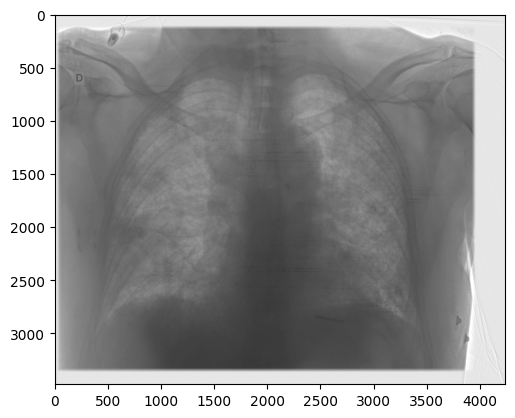

The following images are with Photometric Interpretation MONOCHROME2


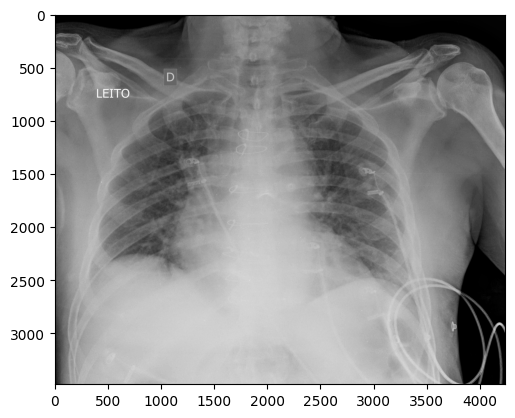

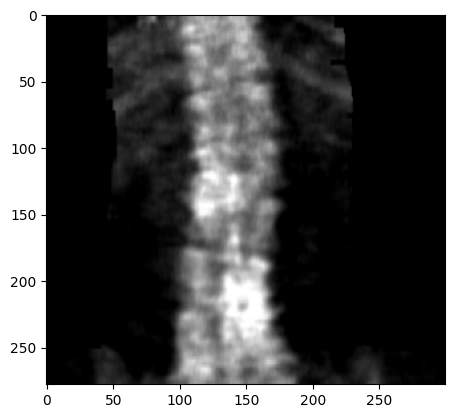

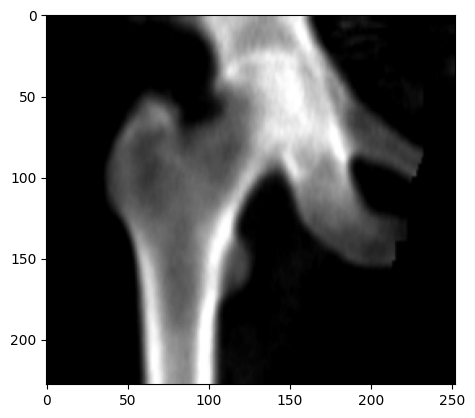

In [9]:
#Let's see the differente type of Photometric Interpreation and how it affects the display of an image

print(dicom_tags_train.PhotometricInterpretation.value_counts())

print('The following images are with Photometric Interpretation MONOCHROME1')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

print('The following images are with Photometric Interpretation MONOCHROME2')

n = 0
for idx, row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME2'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

In [10]:
train = dicom_tags_train.merge(train_df, on =  'SOPInstanceUID')
test = dicom_tags_test.merge(test_df,on =  'SOPInstanceUID')

labels = ['Abdomen', 'Ankle', 'Cervical Spine',
       'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand',
       'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis',
       'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

In [11]:
#Create Label from target
def no_to_label(label):
    label_list_string = []
    trimed_label = label.rstrip()
    label_list = trimed_label.split(" ")
    label_list = [int(i) for i in label_list]
    for label in label_list:
        label_list_string.append(bodyparts[label])
    label_string = ' and '.join(label_list_string)
    return label_string

# Create a new column with label
target_list = train['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
train['Label'] = label_column

#Now we can see the distribution
train['Label'].unique()
    

100%|██████████| 1738/1738 [00:00<00:00, 564087.31it/s]


array(['Chest', 'Hand and Wrist', 'Cervical Spine', 'Pelvis', 'Knee',
       'Wrist', 'Others', 'Finger', 'Hand', 'Feet', 'Elbow', 'Ankle',
       'Lumbar Spine and Thoracic Spine', 'Thoracic Spine',
       'Lumbar Spine', 'Abdomen', 'Skull', 'Hip', 'Shoulder',
       'Finger and Hand', 'Ankle and Knee and Lower Leg',
       'Abdomen and Chest', 'Sinus', 'Lower Leg', 'Chest and Finger',
       'Thigh', 'Ankle and Lower Leg', 'Hip and Knee and Thigh',
       'Clavicles', 'Elbow and Forearm', 'Forearm', 'Abdomen and Pelvis',
       'Ankle and Feet', 'Hip and Thigh', 'Pelvis and Thigh',
       'Knee and Lower Leg', 'Forearm and Shoulder', 'Chest and Pelvis',
       'Cervical Spine and Thoracic Spine',
       'Cervical Spine and Lumbar Spine and Thoracic Spine',
       'Chest and Feet'], dtype=object)

<Axes: xlabel='Label'>

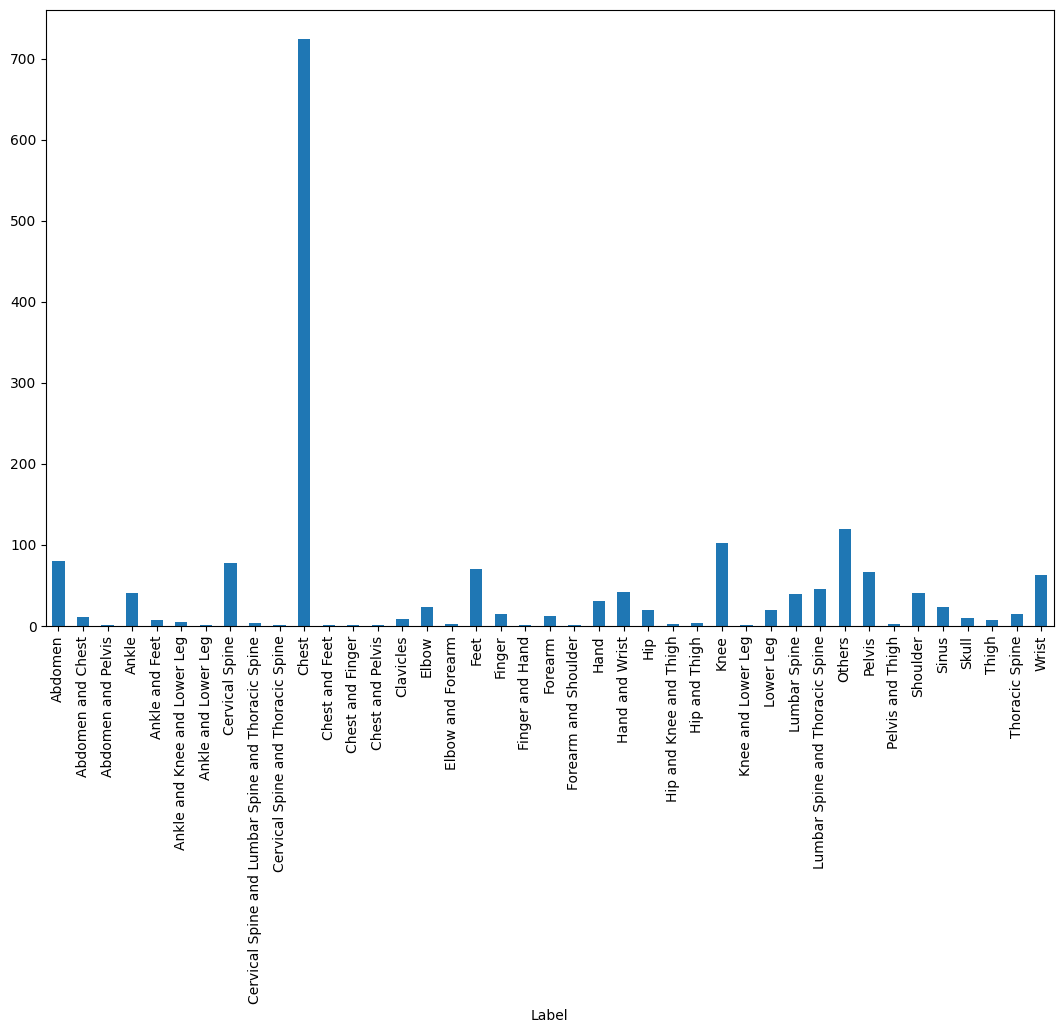

In [12]:
Grouped_target = train.groupby(by='Label').size()
%matplotlib inline
plt.rcParams["figure.figsize"] = (13,8)                              
Grouped_target.plot.bar()


In [13]:
train.Label.value_counts()

Label
Chest                                                 724
Others                                                120
Knee                                                  102
Abdomen                                                80
Cervical Spine                                         77
Feet                                                   70
Pelvis                                                 67
Wrist                                                  63
Lumbar Spine and Thoracic Spine                        45
Hand and Wrist                                         42
Ankle                                                  41
Shoulder                                               40
Lumbar Spine                                           39
Hand                                                   31
Elbow                                                  23
Sinus                                                  23
Lower Leg                                              19
Hip     

In [14]:
#We will drop rows from training data when the rows is lesser than 10
v = train.Label.value_counts()
train = train[train.Label.isin(v.index[v.gt(9)])]

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [16]:
# Creating Images for Training
!rm -r  ./TrainingImages
!mkdir ./TrainingImages

'rm' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.


In [18]:
import pydicom as dicom
from PIL import Image, ImageOps
import os

images_path = "C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train"
ImagePath = []
file_name = train.Filename.to_list()
sop = train.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
train['Imagepath'] = ImagePath

1688it [1:13:11,  2.60s/it]


In [22]:

train_data = train.sample(frac=0.9)
val_data = train.loc[~train['Filename'].isin(train_data['Filename'])].copy()

In [23]:
class DataAugmentation:
    def __init__(self,train,val,batch_size):
        self.train = train
        self.val = val
        self.test = test
        self.batch_size = batch_size
        
    def train_augment(self):
        train_datagen = ImageDataGenerator(
            brightness_range=[0.4,1.5],# brightness
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True)
        
        
        train_generator_df = train_datagen.flow_from_dataframe(dataframe=self.train, 
                                              directory=None,
                                              class_mode='raw',
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2020)
        
        return train_generator_df
    
    
    def valid_augment(self):
        val_datagen = ImageDataGenerator()
        
        val_generator_df = val_datagen.flow_from_dataframe(dataframe=self.val, 
                                              directory=None,
                                              class_mode='raw',            
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2021)
        
        return val_generator_df
        
    
        
        
        
    
        
    

In [24]:
#Augment image for training
dat_aug = DataAugmentation(train_data,val_data,64)
train_gen = dat_aug.train_augment()
val_gen = dat_aug.valid_augment()

KeyError: 'LabelCat'

In [26]:
import tensorflow as tf
from keras.applications.resnet_v2 import ResNet50V2
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D

resNet50 = ResNet50V2(weights="imagenet",input_shape=(224,224,3),include_top=False)
resNet50.trainable = False

model = tf.keras.Sequential([
        resNet50,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
    # We are using last layer which is equal to number label catagories in training data
        tf.keras.layers.Dense(len(train['LabelCat'].unique()), activation='softmax')
    ])

ValueError: Unrecognized keyword arguments passed to BatchNormalization: {'renorm': True}